In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

In [9]:
class Particle:
    
    def __init__(self,Id,r0,v0,a0,t,m,radius):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.m=m
        self.radius = radius

    def Evolution(self,i,oParticle):
        
        self.Force(i,oParticle)
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetAceleration(i)
        
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def SetAceleration(self,i):
        self.A[i] = self.a

    def GetAceleration(self,scale=1):
        return self.A[::scale]
    
    def Force(self,i,oParticle):
        
        if np.linalg.norm(oParticle.r-self.r) < self.radius+oParticle.radius:
            K=1
            n=(oParticle.r-self.r)/np.linalg.norm(oParticle.r-self.r)
            F=-K*np.linalg.norm(oParticle.r-self.r)**3*n
        else:
            F=0
        self.a=F/self.m

    def CheckLimits(self,Limits):
        
        for i in range(len(self.r)):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
            

In [10]:
def RunSimulation(t,Wall):
    
    r01 = np.array([-15.0,1.0])
    v01 = np.array([10.0,0.0])
    a01 = np.array([0.0,0.0])
    m1 = 1.0
    r1 = 2.0
    
    p1 = Particle(1,r01,v01,a01,t,m1,r1)
    
    r02 = np.array([0.0,-1.5])
    v02 = np.array([0.0,0.0])
    a02 = np.array([0.0,0.0])
    m2 = 1.0
    r2 = 2.0
    
    p2 = Particle(2,r02,v02,a02,t,m2,r2)
    
    Wall_ = Wall.copy()
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p1.Evolution(it,p2)
        p2.Evolution(it,p1)
        
        p1.CheckLimits(Wall_)
        p2.CheckLimits(Wall_)

    return [p1,p2]

In [11]:
Limits = np.array([[-20.,20.],[-20.,20.]])

In [12]:
dt=0.05
tmax=10
t=np.arange(0.0,tmax,dt)
Particles = RunSimulation(t,Limits)

Running simulation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 65.18 Steps/s]


In [13]:
scale=1
t=t[::scale]

<IPython.core.display.Javascript object>


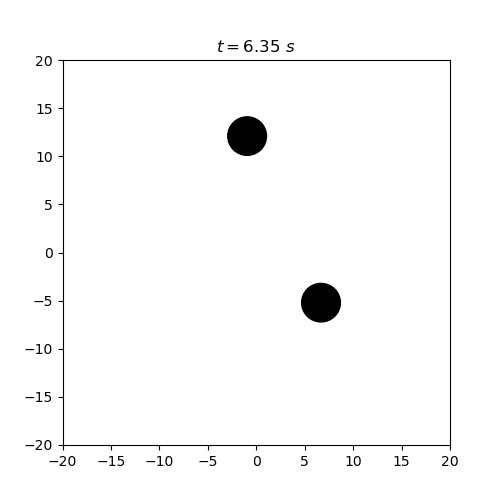

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    x=np.zeros_like(Particles)
    y=np.zeros_like(Particles)
    vx=np.zeros_like(Particles)
    vy=np.zeros_like(Particles)
    dot=np.zeros_like(Particles)
    
    for j in range(len(Particles)):
        x[j] = Particles[j].GetPosition(scale)[i,0]
        y[j] = Particles[j].GetPosition(scale)[i,1]
        vx[j] = Particles[j].GetVelocity(scale)[i,0]
        vy[j] = Particles[j].GetVelocity(scale)[i,1]
    
        dot[j] = plt.Circle((x[j],y[j]),Particles[j].radius, fill=True, color='k')
        ax.add_patch(dot[j])
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)